# Random vectors

In [1]:
import openturns as ot

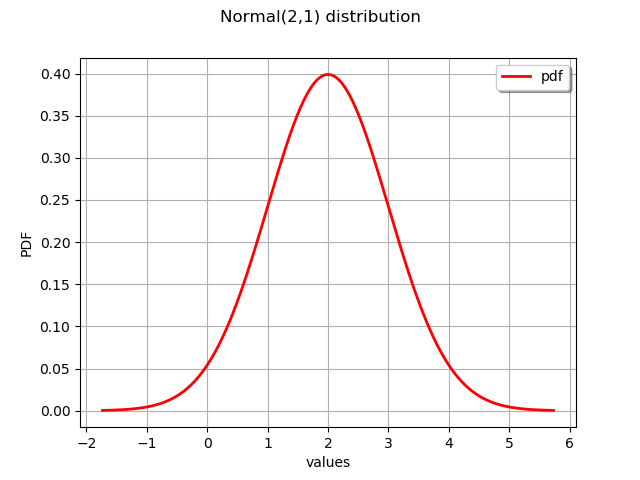

In [2]:
# Gaussian distribution
myNormal = ot.Normal(2.0,1.0)
graph = myNormal.drawPDF()
graph.setTitle('Normal(2,1) distribution')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph

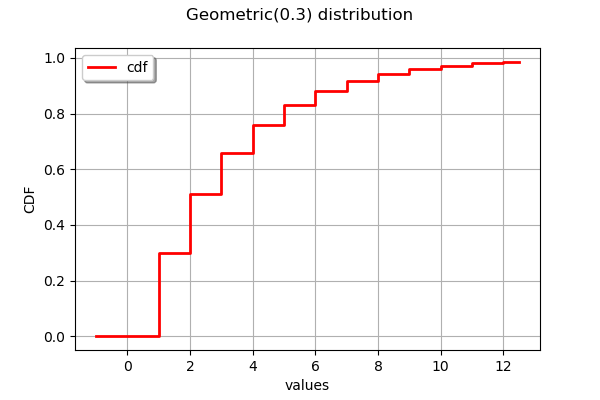

In [3]:
# Geometric distribution
myGeom = ot.Geometric(0.3)
graph = myGeom.drawCDF()
graph.setTitle('Geometric(0.3) distribution')
graph.setXTitle('values')
graph.setLegends(['cdf'])
graph

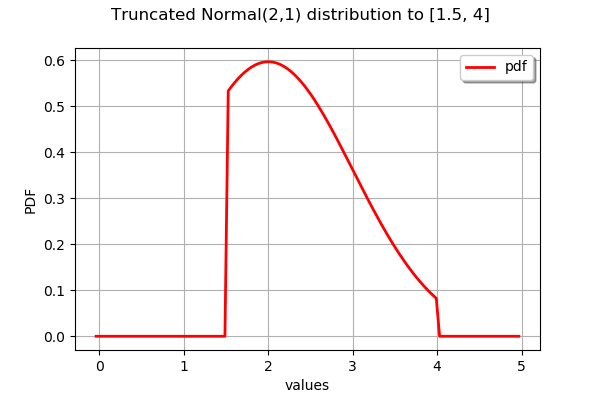

In [4]:
# Truncation
myNormal = ot.Normal(2.0,1.0)
myTruncNormal = ot.TruncatedDistribution(myNormal, 1.5, 4.0)
graph = myTruncNormal.drawPDF()
graph.setTitle('Truncated Normal(2,1) distribution to [1.5, 4]')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph

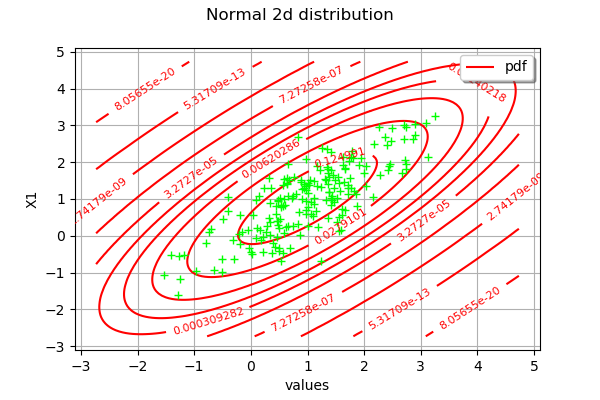

In [5]:
# dim 2: Normal
mu = [1.0, 1.0]
sigma = [1.0, 1.0]
R = ot.CorrelationMatrix(2)
R[0,1] = 0.8
myNormal2d = ot.Normal(mu, sigma, R)
graph = myNormal2d.drawPDF()

graph.setTitle('Normal 2d distribution')
graph.setXTitle('values')
graph.setColors(['red'])
graph.setLegends(['pdf'])

sample = myNormal2d.getSample(200)
cloud = ot.Cloud(sample)
cloud.setColor('green')
graph.add(cloud)
graph

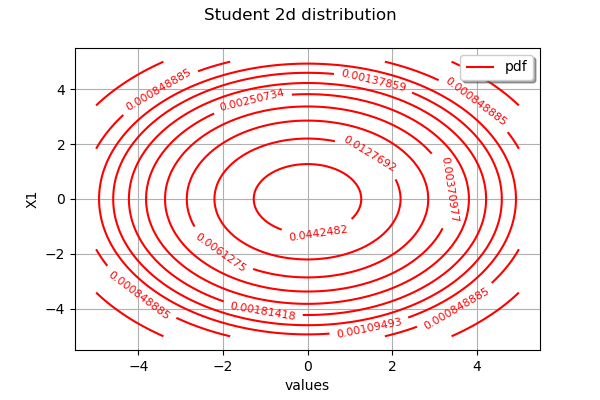

In [6]:
# dim 2 : Student
myStudent = ot.Student(1.5, 4)
graph = myStudent.drawMarginal2DPDF(0,1,[-5]*2, [5]*2, [100]*2)
graph.setTitle('Student 2d distribution')
graph.setXTitle('values')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph

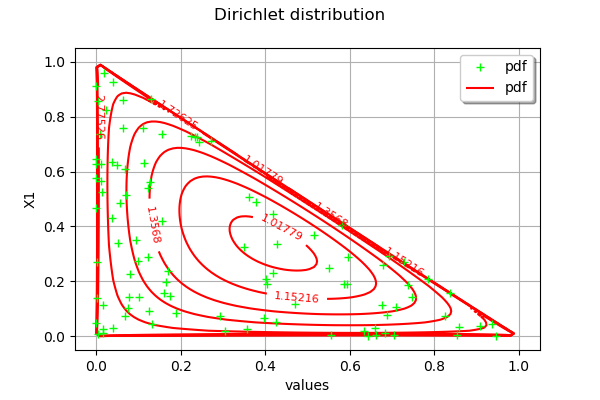

In [7]:
# Dirichlet
myDirichlet = ot.Dirichlet([0.5, 0.6, 0.7])
graph = myDirichlet.drawMarginal2DPDF(0,1,[0.0]*2, [1.0]*2, [100]*2)
sample = myDirichlet.getSample(100)
graph.add(ot.Cloud(sample))
graph.setTitle('Dirichlet distribution')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph.setColors(['red', 'green'])
graph

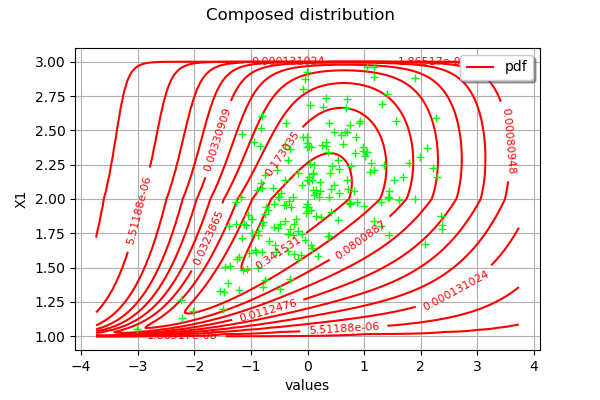

In [8]:
# Composed distribution
myMargins = [ot.Normal(), ot.Triangular(1.0, 2.0, 3.0)]
myCopula = ot.ClaytonCopula(1.5)
myComposedDist = ot.ComposedDistribution(myMargins, myCopula)
graph = myComposedDist.drawPDF()
graph.setTitle('Composed distribution')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph.setColors(['red'])
sample = myComposedDist.getSample(200)
cloud = ot.Cloud(sample)
cloud.setColor('green')
graph.add(cloud)
graph

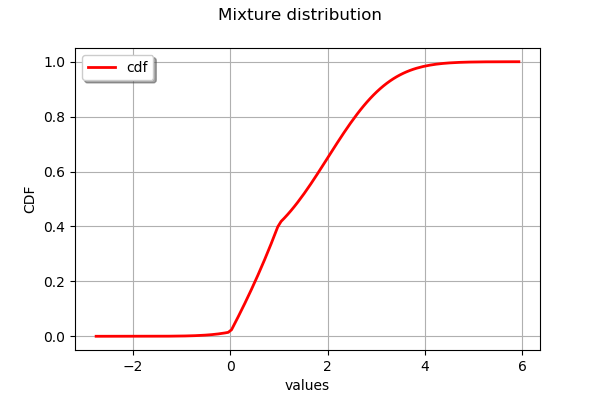

In [9]:
# Mixture 1d
myMixture = ot.Mixture([ot.Uniform(0,1), ot.Normal(2.0, 1.0)], [0.3, 0.7])
graph = myMixture.drawPDF()
graph.setTitle('Mixture distribution')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph = myMixture.drawCDF()
graph.setTitle('Mixture distribution')
graph.setXTitle('values')
graph.setLegends(['cdf'])
graph


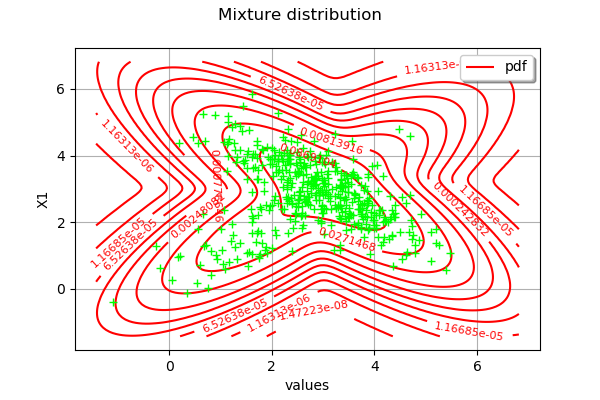

In [10]:
# Mixture dim 2
mu = [2.0, 2.0]
sigma = [1.0, 1.0]
R = ot.CorrelationMatrix(2)
R[0,1] = 0.8
myNormal1 = ot.Normal(mu, sigma, R)
R2 = ot.CorrelationMatrix(2)
R2[0,1] = -0.8
mu2 = [3.0, 3.0]
myNormal2 = ot.Normal(mu2, sigma, R2)

myMixture = ot.Mixture([myNormal1, myNormal2], [0.3, 0.7])
graph = myMixture.drawPDF()
graph.setTitle('Mixture distribution')
graph.setXTitle('values')
graph.setLegends(['pdf'])
graph.setColors(['red'])

sample = myMixture.getSample(500)
cloud = ot.Cloud(sample)
cloud.setColor('green')
graph.add(cloud)
graph


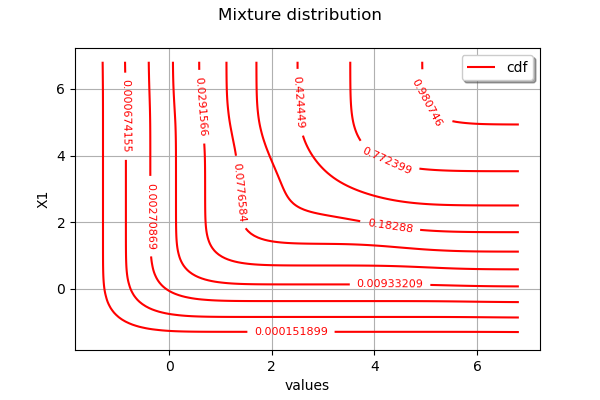

In [11]:
graph = myMixture.drawCDF()
graph.setTitle('Mixture distribution')
graph.setXTitle('values')
graph.setColors(['red'])
graph.setLegends(['cdf'])
graph

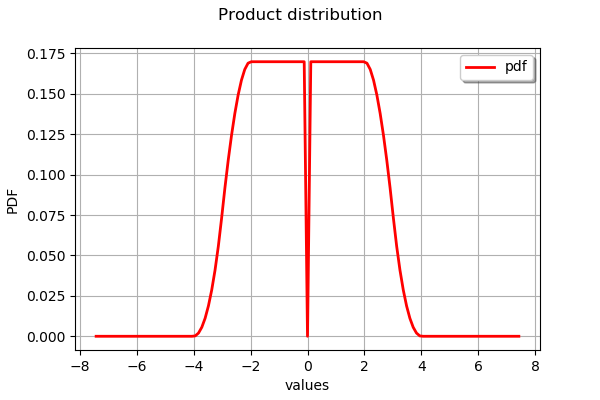

In [12]:
# product of distributions
#myProduct = ot.ProductDistribution(ot.Beta(0.5, 0.6, 0.0, 1.0), ot.Triangular(2.0, 3.0, 4.0))
myProduct = ot.ProductDistribution(ot.Uniform(-1.0,1.0), ot.Triangular(2.0, 3.0, 4.0))
graph = myProduct.drawPDF()
graph.setTitle('Product distribution')
graph.setXTitle('values')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph

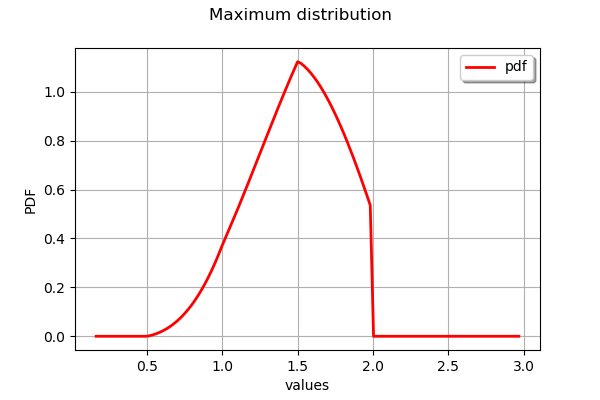

In [13]:
# Maximum of distributions
myMax = ot.MaximumDistribution([ot.Triangular(0.0, 1.0, 2.0), ot.Triangular(0.5, 1.5, 2.5)])
graph = myMax.drawPDF()
graph.setTitle('Maximum distribution')
graph.setXTitle('values')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph

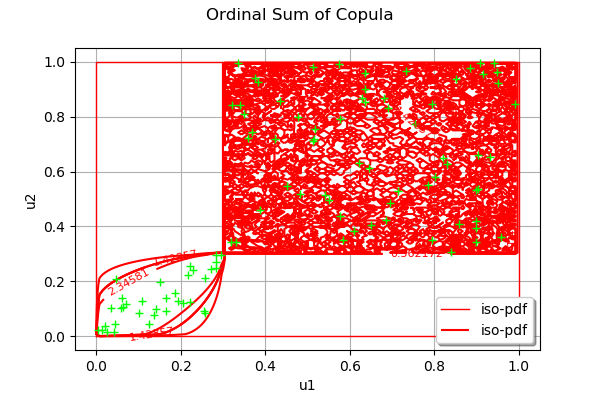

In [14]:
# Ordinal sum of copulas
myCop1 = ot.GumbelCopula(2)
myCop2 = ot.NormalCopula(2)
alpha = 0.3
myOrdSumCop = ot.OrdinalSumCopula([myCop1, myCop2], [alpha])
graph = myOrdSumCop.drawPDF()
graph.setTitle('Ordinal Sum of Copula')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setLegends(['iso-pdf'])
graph.setColors(['red'])
graph.setLegendPosition('bottomright')

sample = myOrdSumCop.getSample(100)
cloud = ot.Cloud(sample)
cloud.setColor('green')
graph.add(cloud)
graph

In [15]:
graph = myOrdSumCop.drawCDF()
graph.setTitle('Ordinal Sum of Copula')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setColors(['red'])
graph.setLegends(['iso-cdf'])
graph.setLegendPosition('bottomright')
#graph

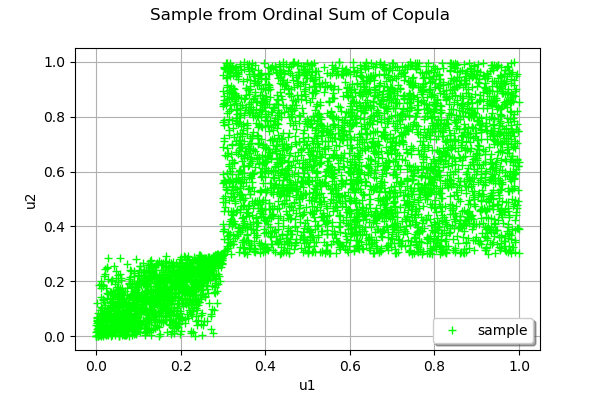

In [16]:
sample = myOrdSumCop.getSample(5000)
graph = ot.Graph('Sample from Ordinal Sum of Copula', 'u1', 'u2', True, 'bottomright')
graph.add(ot.Cloud(sample))
graph.setColors(['green'])
graph.setLegends(['sample'])
graph.setLegendPosition('bottomright')
graph

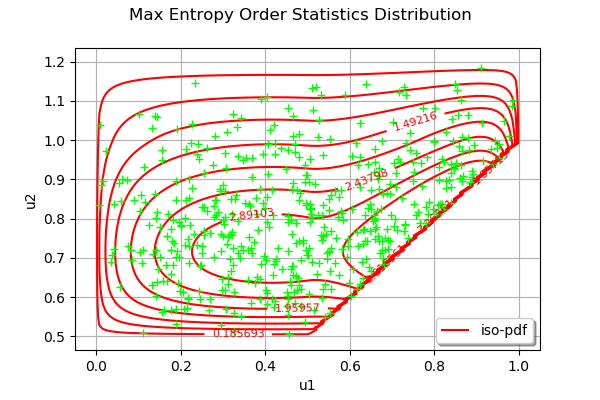

In [17]:
# Maximum entropy order statistics distribution

myDist = [ot.Beta(1.5, 3.2, 0.0, 1.0),  ot.Beta(2.0, 4.3, 0.5, 1.2)]
myOrderStatDist = ot.MaximumEntropyOrderStatisticsDistribution(myDist)
graph = myOrderStatDist.drawPDF()
graph.setTitle('Max Entropy Order Statistics Distribution')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setColors(['red'])
graph.setLegends(['iso-pdf'])
graph.setLegendPosition('bottomright')

sample = myOrderStatDist.getSample(500)
cloud = ot.Cloud(sample)
cloud.setColor('green')
graph.add(cloud)
graph

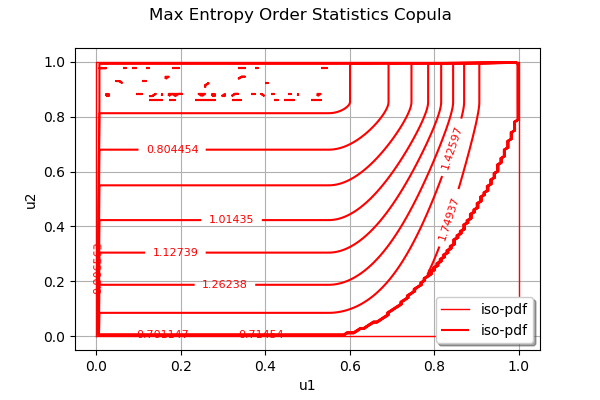

In [18]:
# the associated copula
cop = myOrderStatDist.getCopula()
graph = cop.drawPDF()
graph.setTitle('Max Entropy Order Statistics Copula')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setColors(['red'])
graph.setLegends(['iso-pdf'])
graph.setLegendPosition('bottomright')
graph

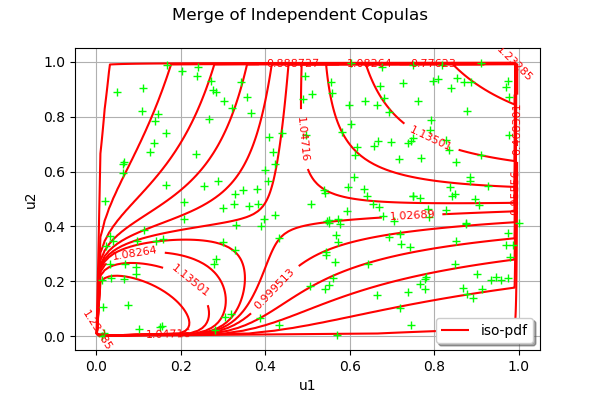

In [19]:
# ComposedCopula

myColl = [ot.ClaytonCopula(0.3), ot.NormalCopula(3)]
myMergedCop = ot.ComposedCopula(myColl)

graph = myMergedCop.drawMarginal2DPDF(0,1,[0.0]*2, [1.0]*2, [100]*2)
graph.setTitle('Merge of Independent Copulas')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setColors(['red'])
graph.setLegends(['iso-pdf'])
graph.setLegendPosition('bottomright')

sample = myMergedCop.getSample(200)
sample01 = sample.getMarginal([0,1])
cloud = ot.Cloud(sample01)
cloud.setColor('green')
graph.add(cloud)
graph

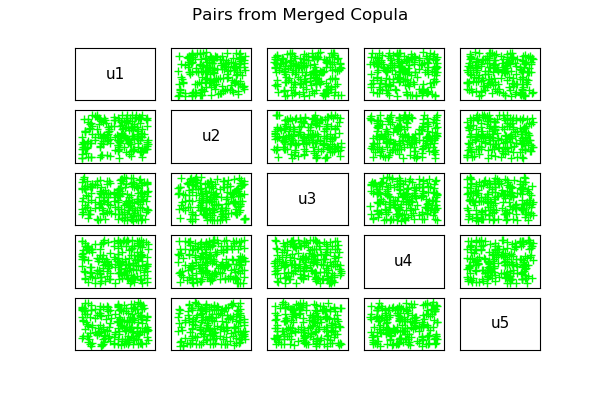

In [20]:
sample.setDescription(['u'+str(i+1) for i in range(5)])
graph = ot.Graph('Pairs from Merged Copula')

graph = ot.VisualTest.DrawPairs(sample)
#graph.setColors(['green'])
graph

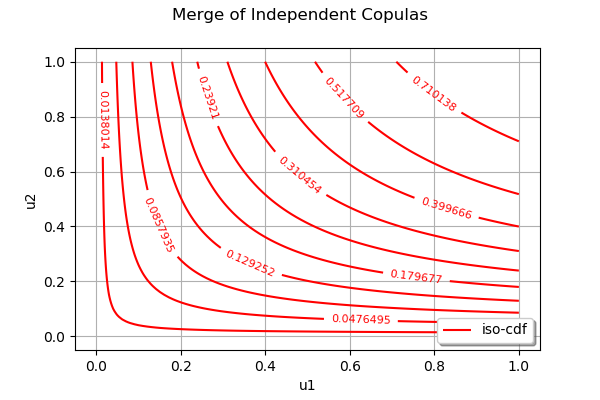

In [21]:
graph = myMergedCop.drawMarginal2DCDF(0,1,[0.0]*2, [1.0]*2, [100]*2)
graph.setTitle('Merge of Independent Copulas')
graph.setXTitle('u1')
graph.setYTitle('u2')
graph.setColors(['red'])
graph.setLegends(['iso-cdf'])
graph.setLegendPosition('bottomright')
graph

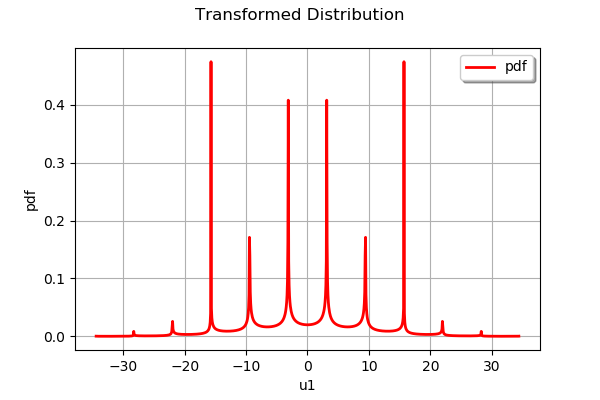

In [22]:
# CompositeDistribution

distX = ot.Normal(0.0, 10.0)
myFunc = ot.SymbolicFunction(['x'], ['x+sin(x)'])
distFin = ot.CompositeDistribution(myFunc, distX)

graph = distFin.drawPDF(1024)
graph.setTitle('Transformed Distribution')
graph.setXTitle('u1')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph.setLegendPosition('topright')
graph

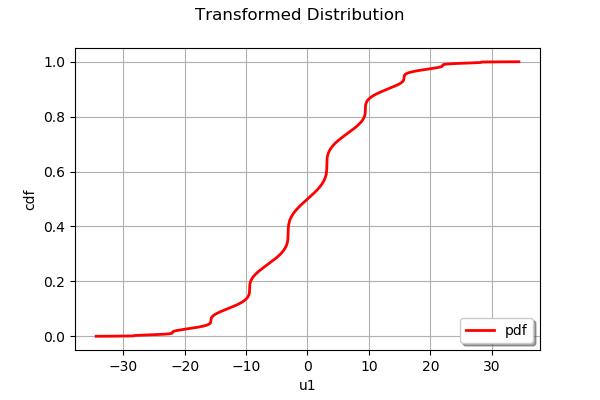

In [23]:
graph = distFin.drawCDF(1024)
graph.setTitle('Transformed Distribution')
graph.setXTitle('u1')
graph.setYTitle('cdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph.setLegendPosition('bottomright')
graph

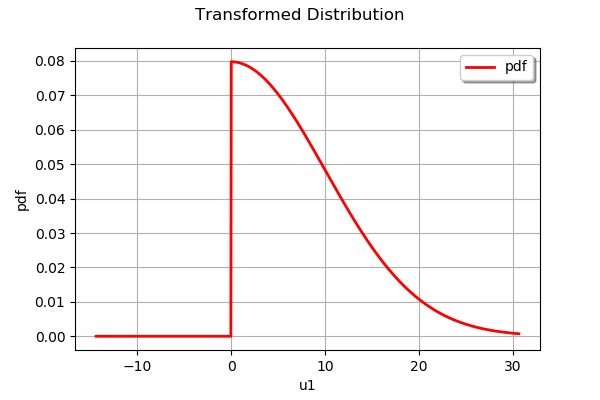

In [24]:
distFin = distX.abs()
graph = distFin.drawPDF(1024)
graph.setTitle('Transformed Distribution')
graph.setXTitle('u1')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph.setLegendPosition('topright')
graph

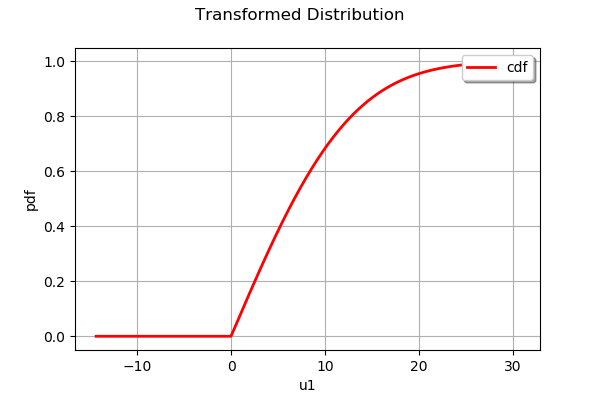

In [25]:
graph = distFin.drawCDF(1024)
graph.setTitle('Transformed Distribution')
graph.setXTitle('u1')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['cdf'])
graph.setLegendPosition('topright')
graph

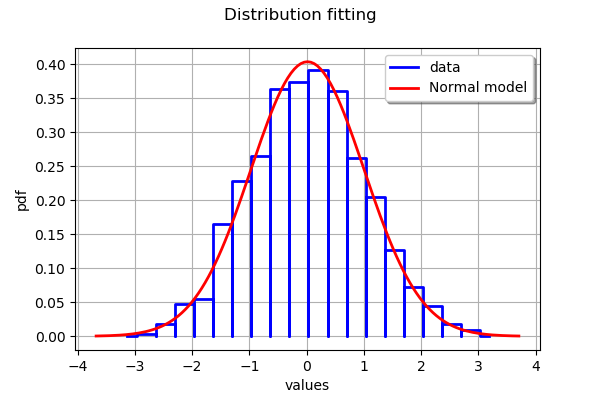

In [26]:
# parametric reconstruction

sample = ot.Normal().getSample(1000)
graph = ot.HistogramFactory().build(sample).drawPDF()
graph.setTitle('Distribution fitting')
graph.setXTitle('values')
graph.setYTitle('pdf')
myNormal = ot.NormalFactory().build(sample)
graph.add(myNormal.drawPDF())
graph.setColors(['blue', 'red'])
graph.setLegends(['data', 'Normal model'])
graph

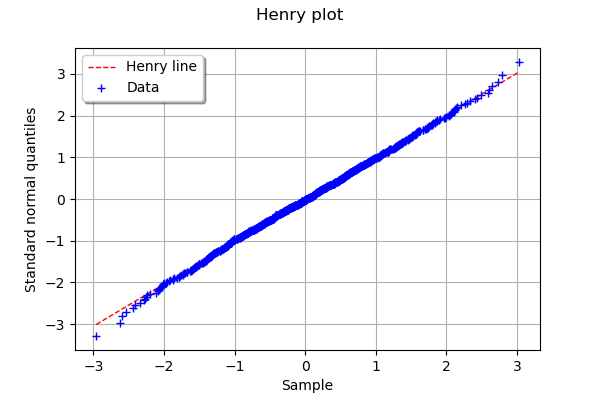

In [27]:
# Henry test
ot.VisualTest.DrawHenryLine(sample)


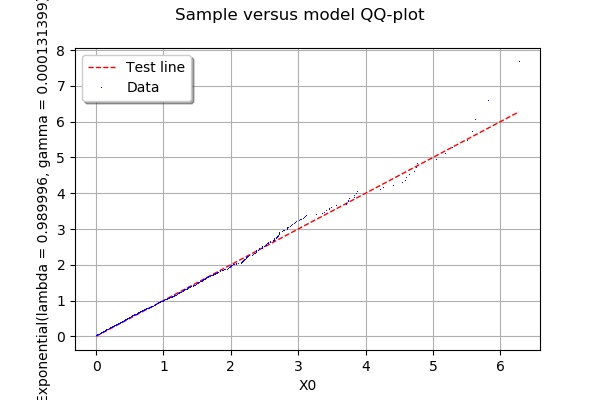

In [28]:
# QQ Plot test
sample = ot.Exponential(1.0).getSample(1000)
myExp = ot.ExponentialFactory().build(sample)
graph = ot.VisualTest.DrawQQplot(sample, myExp)
graph

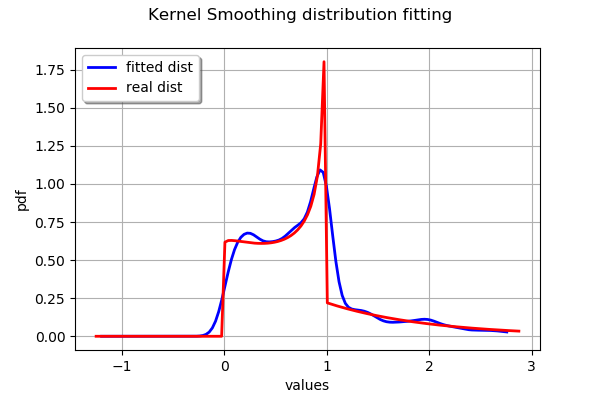

In [29]:
# non parametric reconstruction

#myMargins = [ot.Normal(), ot.Triangular(1.0, 2.0, 3.0)]
#myCopula = ot.ClaytonCopula(1.5)
#myComposedDist = ot.ComposedDistribution(myMargins, myCopula)

#myRealDist = ot.Mixture([ot.Normal(0.0, 1.0), ot.Normal(3.0, 0.5)], [0.6, 0.4])
myRealDist = ot.Mixture([ot.Exponential(1.0), ot.Beta(1.5, 2.0, 0.0, 1.0)], [0.6, 0.4])
sample = myRealDist.getSample(1000)

myDist = ot.KernelSmoothing().build(sample)
graph = myDist.drawPDF()
graph.add(myRealDist.drawPDF())
graph.setTitle('Kernel Smoothing distribution fitting')
graph.setXTitle('values')
graph.setYTitle('pdf')
graph.setColors(['blue', 'red'])
graph.setLegendPosition('topleft')
graph.setLegends(['fitted dist', 'real dist'])
graph

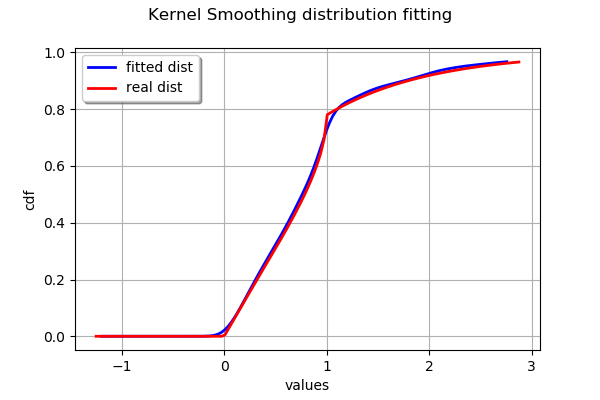

In [30]:
graph = myDist.drawCDF()
graph.add(myRealDist.drawCDF())
graph.setTitle('Kernel Smoothing distribution fitting')
graph.setXTitle('values')
graph.setYTitle('cdf')
graph.setColors(['blue', 'red'])
graph.setLegendPosition('topleft')
graph.setLegends(['fitted dist', 'real dist'])
graph

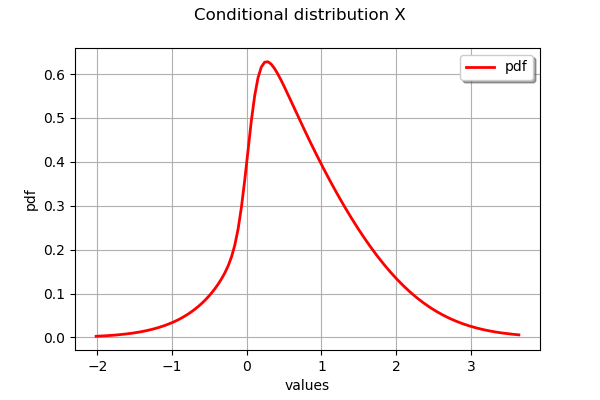

In [31]:
# conditional distribution
distY = ot.Beta(1.5, 2.0, 0.0, 1.0)
distXgivenT = ot.Normal()
g = ot.SymbolicFunction(['y'], ['y', '0.1+y^2'])
distX = ot.ConditionalDistribution(distXgivenT, distY, g)

graph = distX.drawPDF()
graph.setTitle('Conditional distribution X')
graph.setXTitle('values')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph

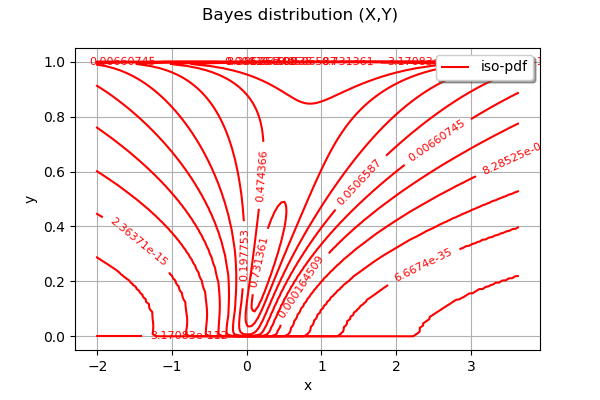

In [32]:
distXY = ot.BayesDistribution(distXgivenT, distY, g)

graph = distXY.drawPDF()
graph.setTitle('Bayes distribution (X,Y)')
graph.setXTitle('x')
graph.setYTitle('y')
graph.setColors(['red'])
graph.setLegends(['iso-pdf'])
graph

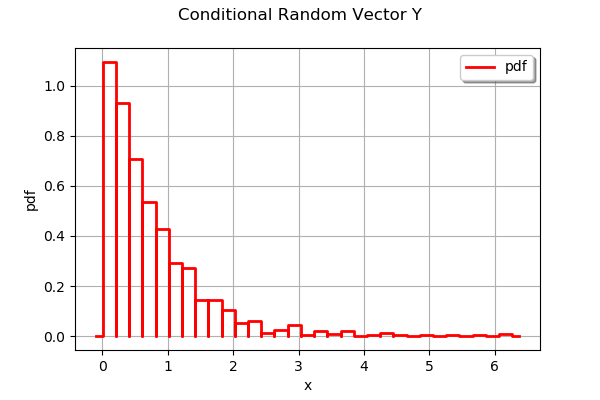

In [33]:
# Vecteur aleatoire conditionne
distXgivenT = ot.Exponential()
distGamma = ot.Uniform(1.0, 2.0)
distAlpha = ot.Uniform(0.0, 0.1)
distTheta = ot.ComposedDistribution([distGamma, distAlpha])
rvTheta = ot.RandomVector(distTheta)

rvX = ot.ConditionalRandomVector(distXgivenT, rvTheta)
sampleX = rvX.getSample(1000)

histX = ot.HistogramFactory().build(sampleX)
graph = histX.drawPDF()
graph.setTitle('Conditional Random Vector Y')
graph.setXTitle('x')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph

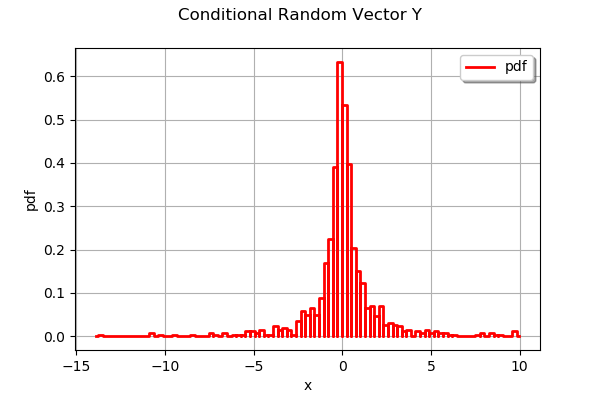

In [34]:
distXgivenTheta = ot.Normal()
distY = ot.Normal(0.0, 1.0)
g = ot.SymbolicFunction(['y'], ['y', '0.1+y^2'])
rvTheta = ot.CompositeRandomVector(g, ot.RandomVector(distY))
rvX = ot.ConditionalRandomVector(distXgivenTheta, rvTheta)
sampleX = rvX.getSample(1000)

histX = ot.HistogramFactory().build(sampleX)
graph = histX.drawPDF()
graph.setTitle('Conditional Random Vector Y')
graph.setXTitle('x')
graph.setYTitle('pdf')
graph.setColors(['red'])
graph.setLegends(['pdf'])
graph